In [4]:
from zipfile import ZipFile, ZIP_STORED, ZIP_DEFLATED

with ZipFile("new.zip", "w") as zf:
    with zf.open("inside.txt", "w") as f:
        f.write(bytes("hello world!\n", encoding="utf-8"))

In [5]:
s = "hello"
b = bytes(s, encoding="utf-8")
print(b)

b'hello'


In [7]:
from zipfile import ZipFile, ZIP_STORED, ZIP_DEFLATED
from io import TextIOWrapper
import csv

with ZipFile("new.zip", "w") as zf:
    with zf.open("inside.csv", "w") as raw:
        with TextIOWrapper(raw) as f:
            writer = csv.writer(f)
            writer.writerow(["x", "y"]) # header
            writer.writerow(["1", "2"])
            writer.writerow(["3", "4"])

In [8]:
from zipfile import ZipFile, ZIP_STORED, ZIP_DEFLATED
from io import TextIOWrapper
import csv, time

def test_compression(zip_name, compression_mode):
    with ZipFile(zip_name, "w", compression=compression_mode) as zf:
        with zf.open("inside.csv", "w") as raw:
            with TextIOWrapper(raw) as f:
                writer = csv.writer(f)
                writer.writerow(["x", "y"]) # header
                for i in range(5000000):
                    writer.writerow([str(i*2), str(i*2+1)])

In [9]:
t0 = time.time()
test_compression("deflated.zip", ZIP_DEFLATED)
t1 = time.time()
print(t1-t0)

9.854629755020142


In [10]:
t0 = time.time()
test_compression("regular.zip", ZIP_STORED)
t1 = time.time()
print(t1-t0)

6.936971426010132


# Part 2

<Figure size 432x288 with 0 Axes>

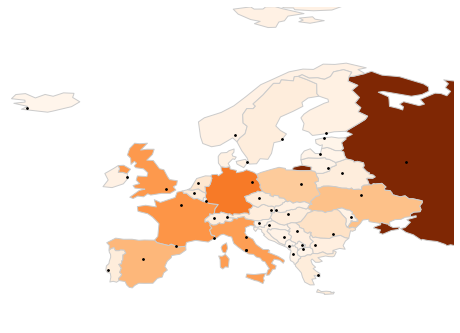

In [16]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

eu = world[world["continent"] == "Europe"]
#ax = eu.plot(column="pop_est")
geopandas.sjoin(cities, eu).plot(ax=ax)

#Country styling
ax = eu.plot(column="pop_est", cmap="Oranges", edgecolor="0.8", figsize=(8,8))

#Lat Long Limits
ax.set_xlim(-25, 45)
ax.set_ylim(30, 80)

#Cities
geopandas.sjoin(cities, eu).plot(ax=ax, color="black", markersize=3)

ax.set_axis_off()